
📅 Date: 21-05-2025


/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["last_log_date"] = pd.to_datetime(df["last_log_date"], dayfirst=True, errors='coerce')


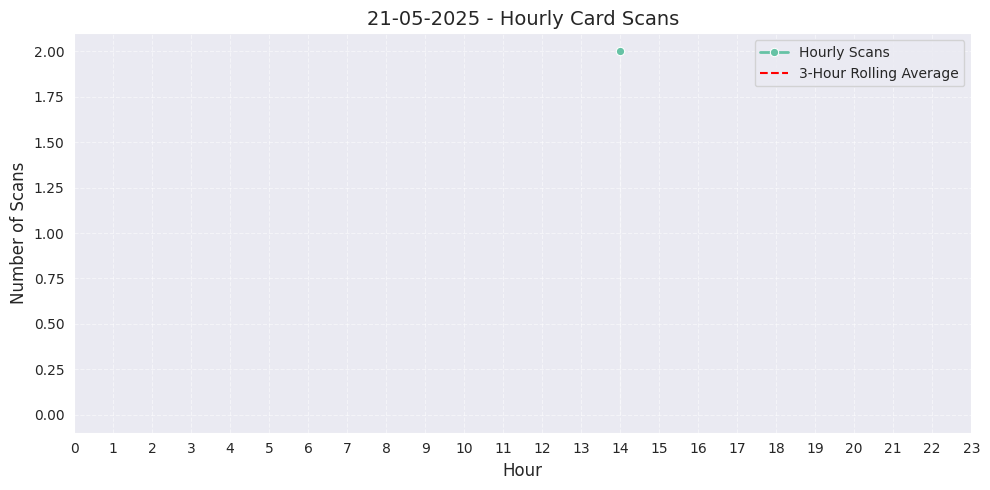

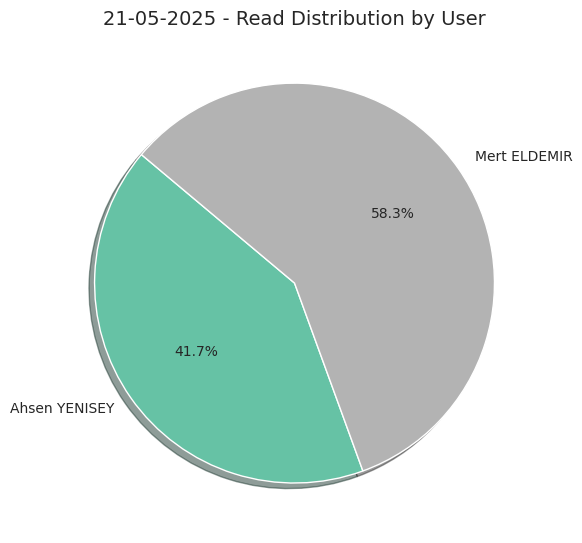

/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


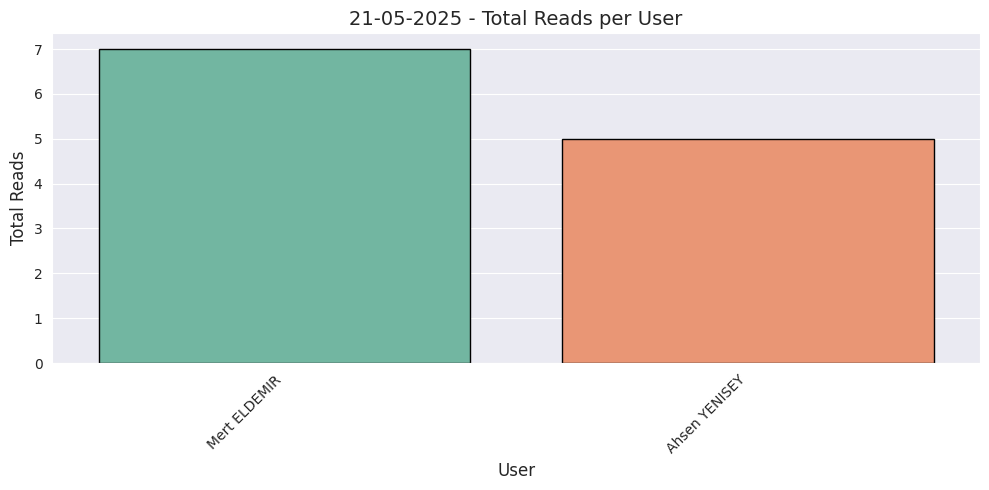

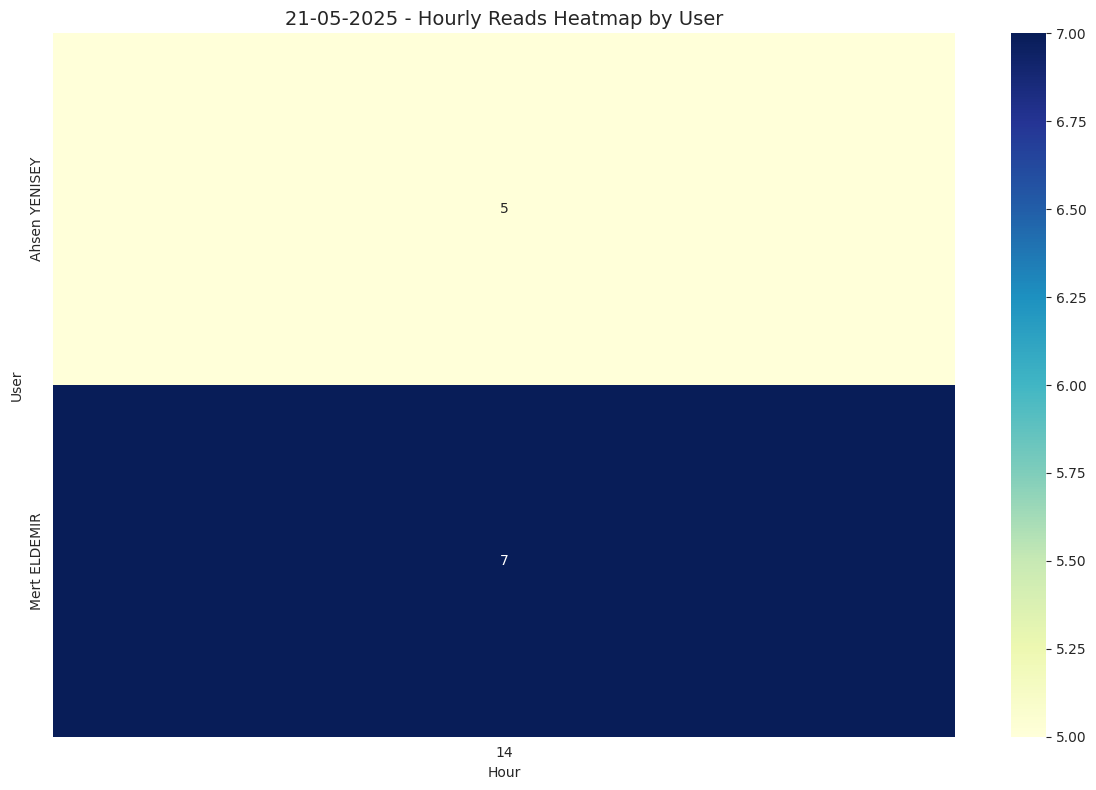


📅 Date: 23-05-2025


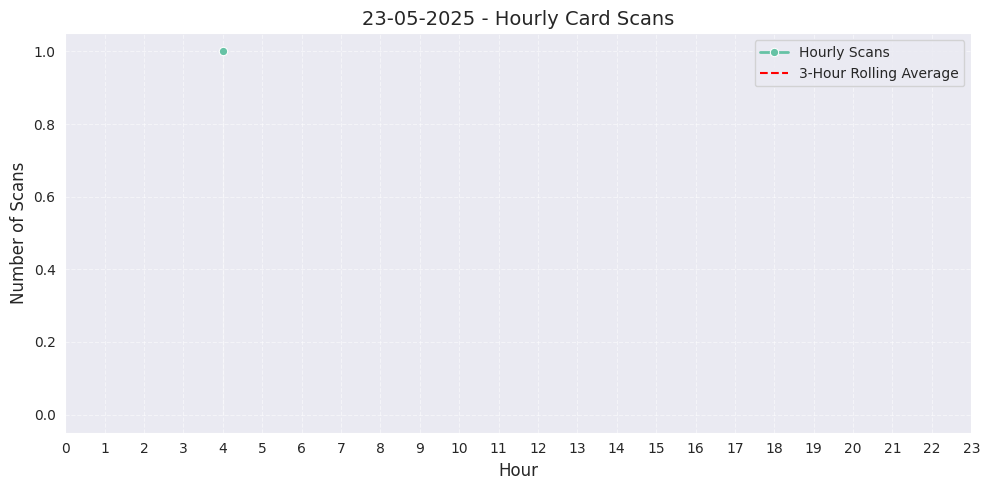

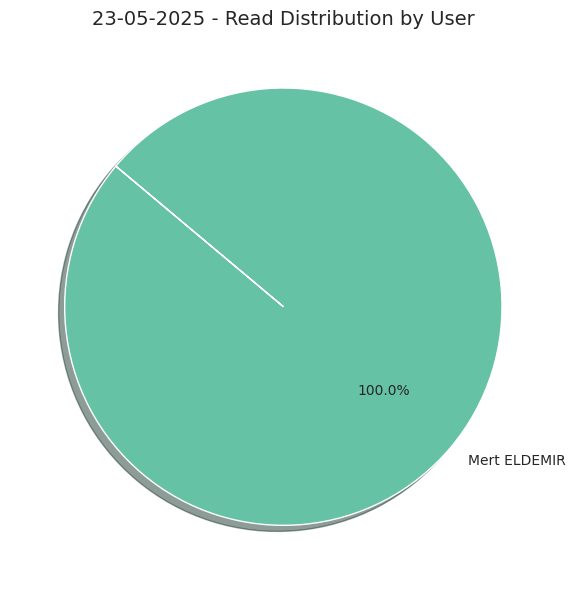

/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


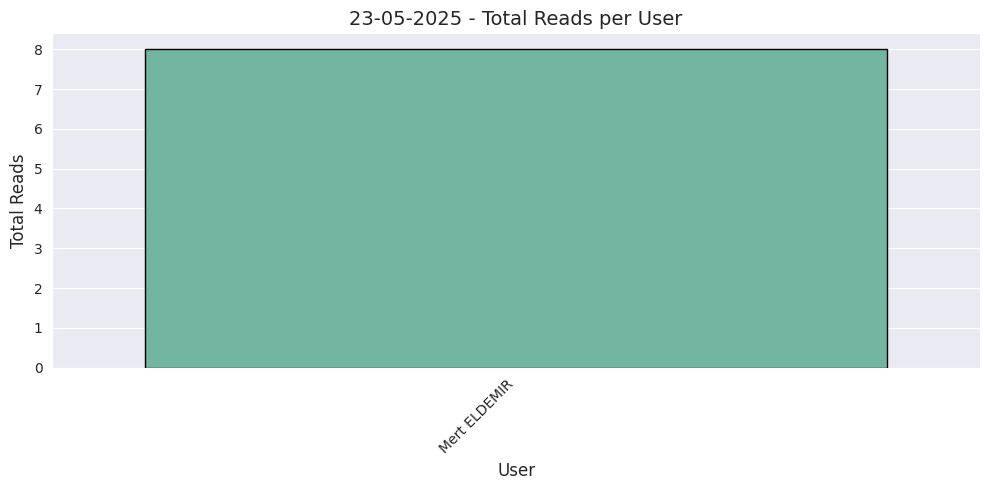

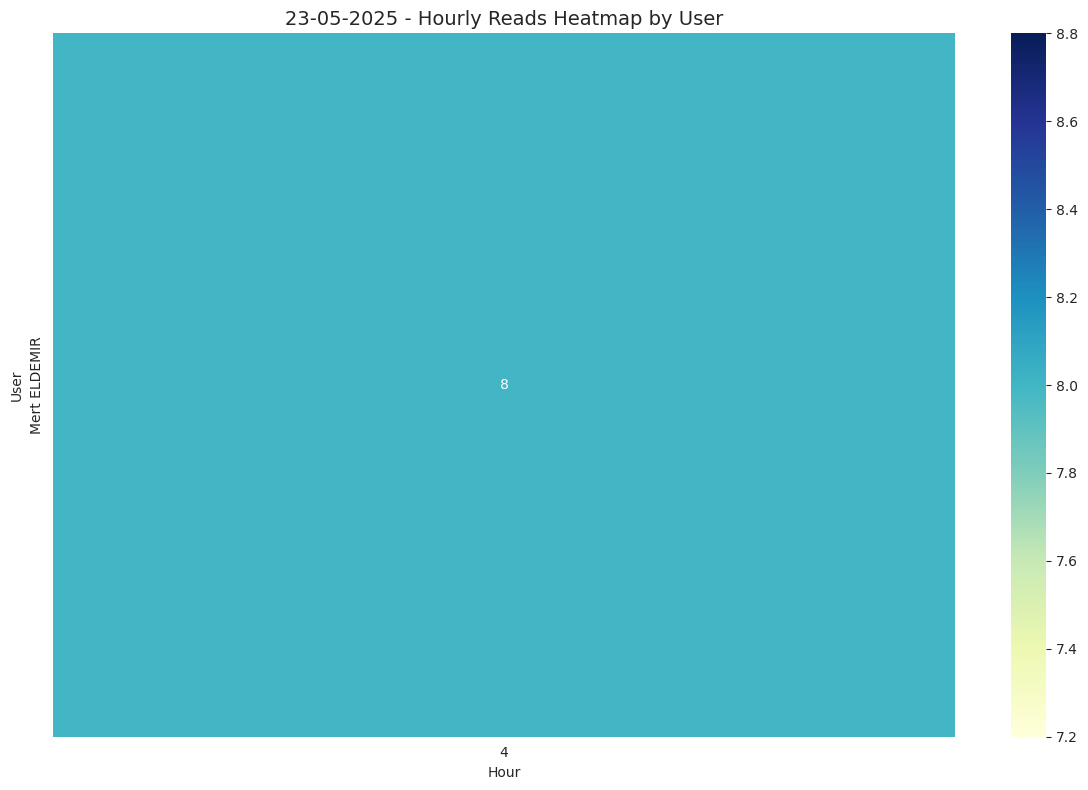


📅 Date: 26-05-2025


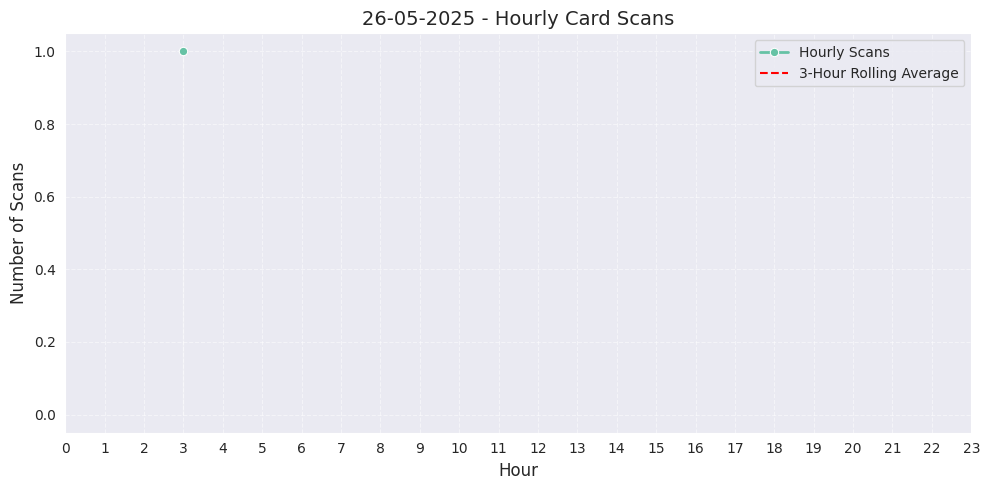

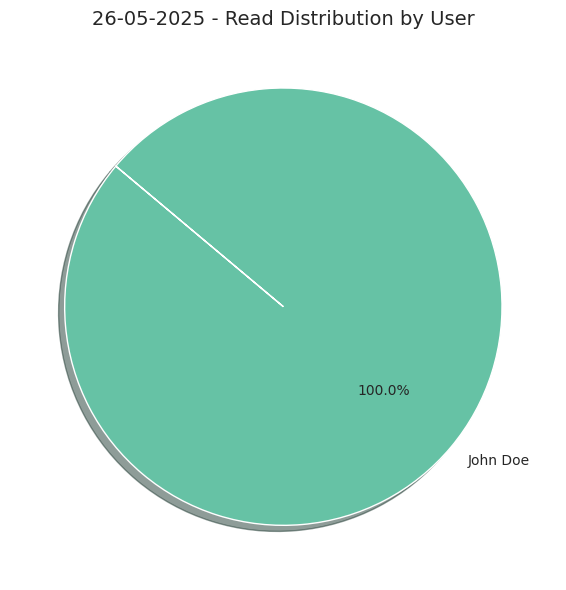

/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


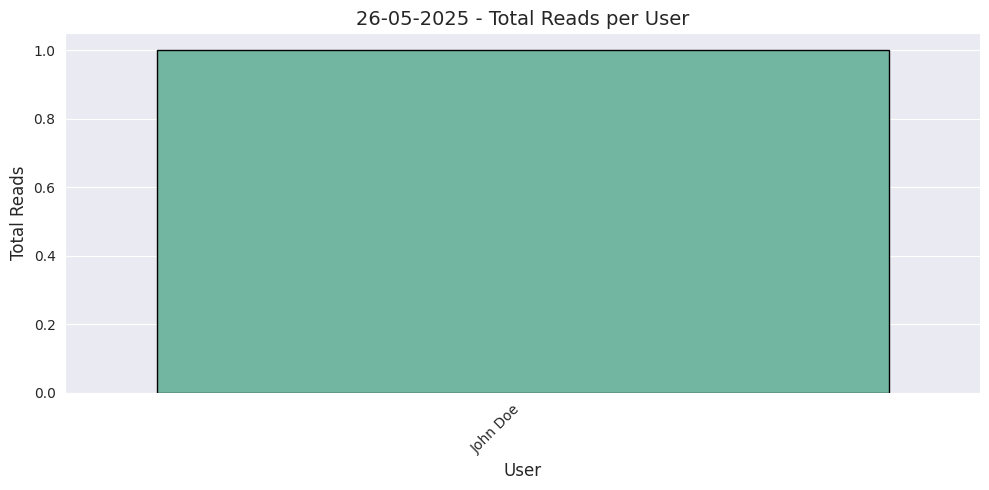

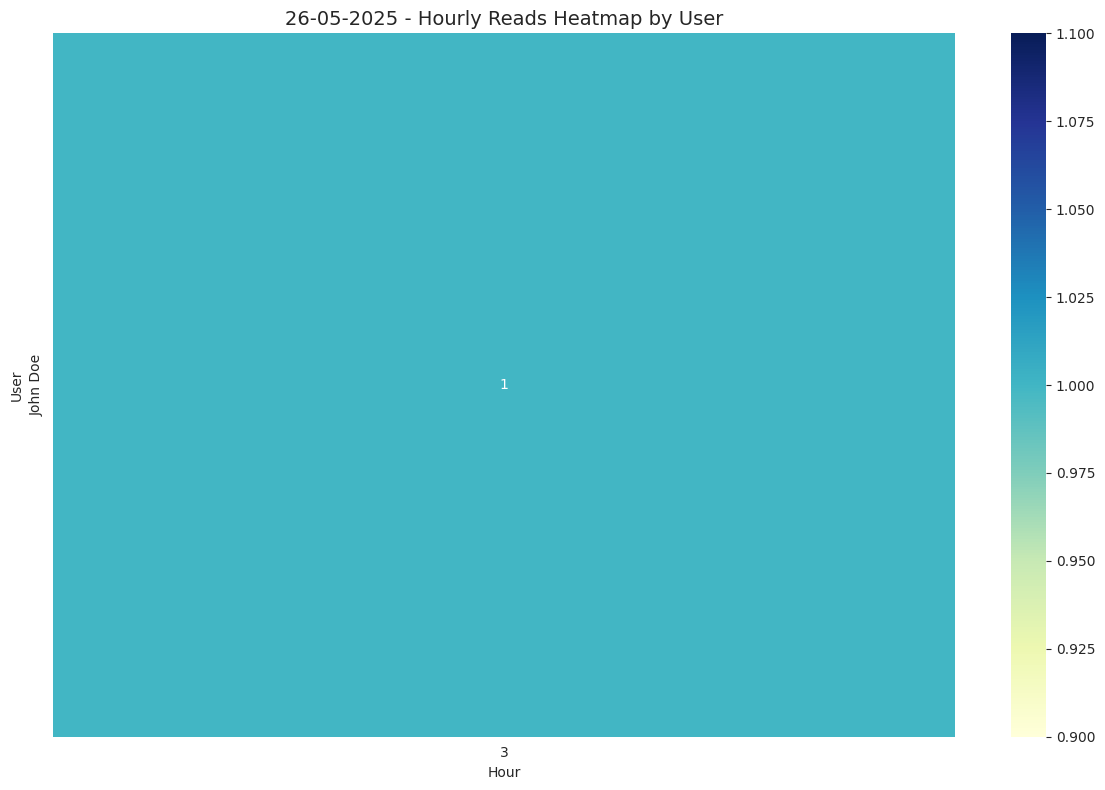

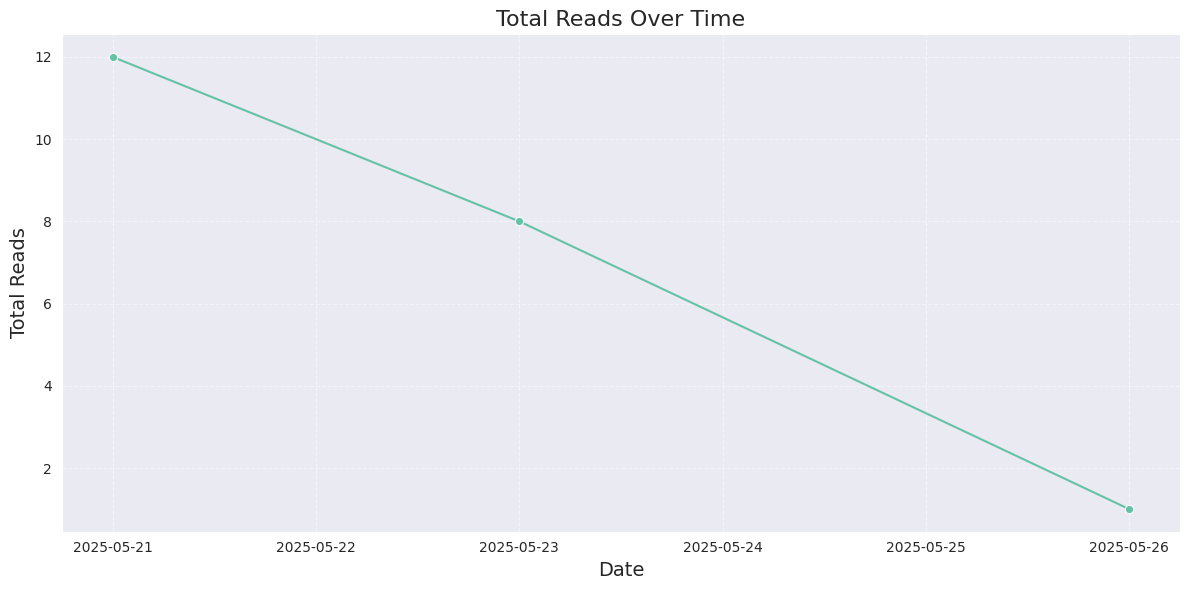

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set_style("darkgrid")
sns.set_palette("Set2")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.dpi"] = 100

attendance_folder = "../../Database/attendance_lists"

csv_files = sorted([
    f for f in os.listdir(attendance_folder)
    if f.endswith(".csv")
])

dates = []
total_reads_per_date = []

for file in csv_files:
    file_path = os.path.join(attendance_folder, file)
    df = pd.read_csv(file_path)
    report_date_str = os.path.splitext(file)[0]

    if df.empty:
        print(f"⚠️ {report_date_str}: Data file is empty, skipped.")
        continue


    df["last_log_date"] = pd.to_datetime(df["last_log_date"], dayfirst=True, errors='coerce')
    missing_dates = df["last_log_date"].isna().sum()
    if missing_dates > 0:
        print(f"⚠️ {report_date_str}: {missing_dates} rows with invalid dates were skipped.")

 
    df = df.dropna(subset=["last_log_date"])  
    df["hour"] = df["last_log_date"].dt.hour

    print(f"\n📅 Date: {report_date_str}")


    hourly_counts = df.groupby("hour")["card_uid"].count().sort_index()
    if not hourly_counts.empty:
        rolling_avg = hourly_counts.rolling(window=3, center=True).mean()

        plt.figure(figsize=(10, 5))
        sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o", linewidth=2, label="Hourly Scans")
        sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, color='red', linestyle='--', label='3-Hour Rolling Average')
        plt.fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3)
        plt.title(f"{report_date_str} - Hourly Card Scans", fontsize=14)
        plt.xlabel("Hour", fontsize=12)
        plt.ylabel("Number of Scans", fontsize=12)
        plt.xticks(range(0, 24))
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()


    user_totals = df.groupby("user_name")["total_reads"].sum()
    user_totals = user_totals[user_totals > 0]
    if not user_totals.empty:
        plt.figure(figsize=(6, 6))
        user_totals.plot(kind="pie", autopct="%1.1f%%", startangle=140, shadow=True, cmap="Set2")
        plt.title(f"{report_date_str} - Read Distribution by User", fontsize=14)
        plt.ylabel("")
        plt.tight_layout()
        plt.show()


    bar_data = df.sort_values("total_reads", ascending=False)
    if not bar_data.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(
            data=bar_data,
            x="user_name",
            y="total_reads",
            edgecolor="black",
            palette="Set2"
        )
        plt.title(f"{report_date_str} - Total Reads per User", fontsize=14)
        plt.xlabel("User", fontsize=12)
        plt.ylabel("Total Reads", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


    heatmap_data = df.pivot_table(index='user_name', columns='hour', values='total_reads', aggfunc='sum', fill_value=0)
    if not heatmap_data.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
        plt.title(f"{report_date_str} - Hourly Reads Heatmap by User", fontsize=14)
        plt.xlabel("Hour")
        plt.ylabel("User")
        plt.tight_layout()
        plt.show()


    total_reads_per_date.append(df["total_reads"].sum())
    try:
        date_parsed = pd.to_datetime(report_date_str, dayfirst=True)
    except Exception:
        date_parsed = pd.NaT
    dates.append(date_parsed)


time_series_df = pd.DataFrame({"date": dates, "total_reads": total_reads_per_date})
time_series_df = time_series_df.dropna(subset=["date"])
time_series_df = time_series_df.sort_values("date")

if not time_series_df.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='total_reads', data=time_series_df, marker='o')
    plt.title("Total Reads Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Reads", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()



📅 Date: 21-05-2025


/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["last_log_date"] = pd.to_datetime(df["last_log_date"], dayfirst=True, errors='coerce')


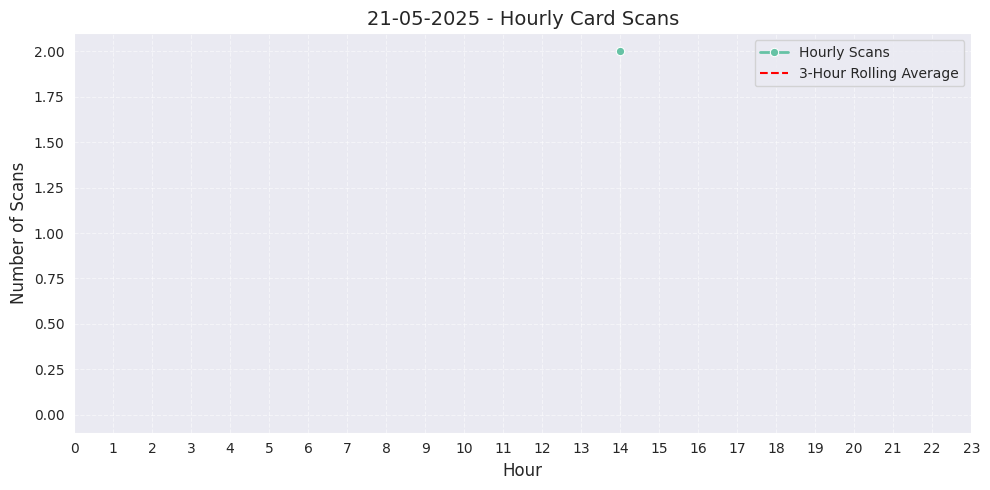

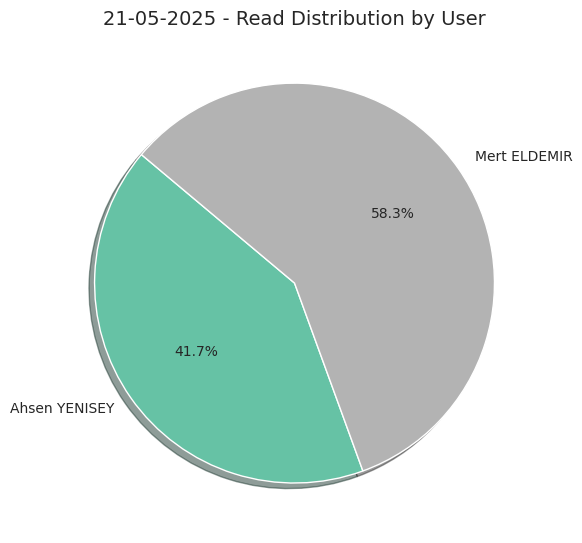

/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


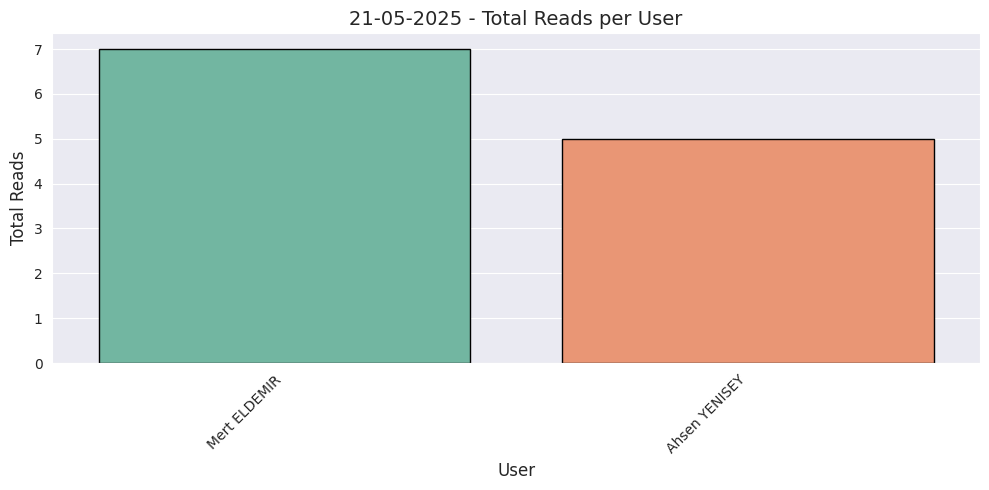

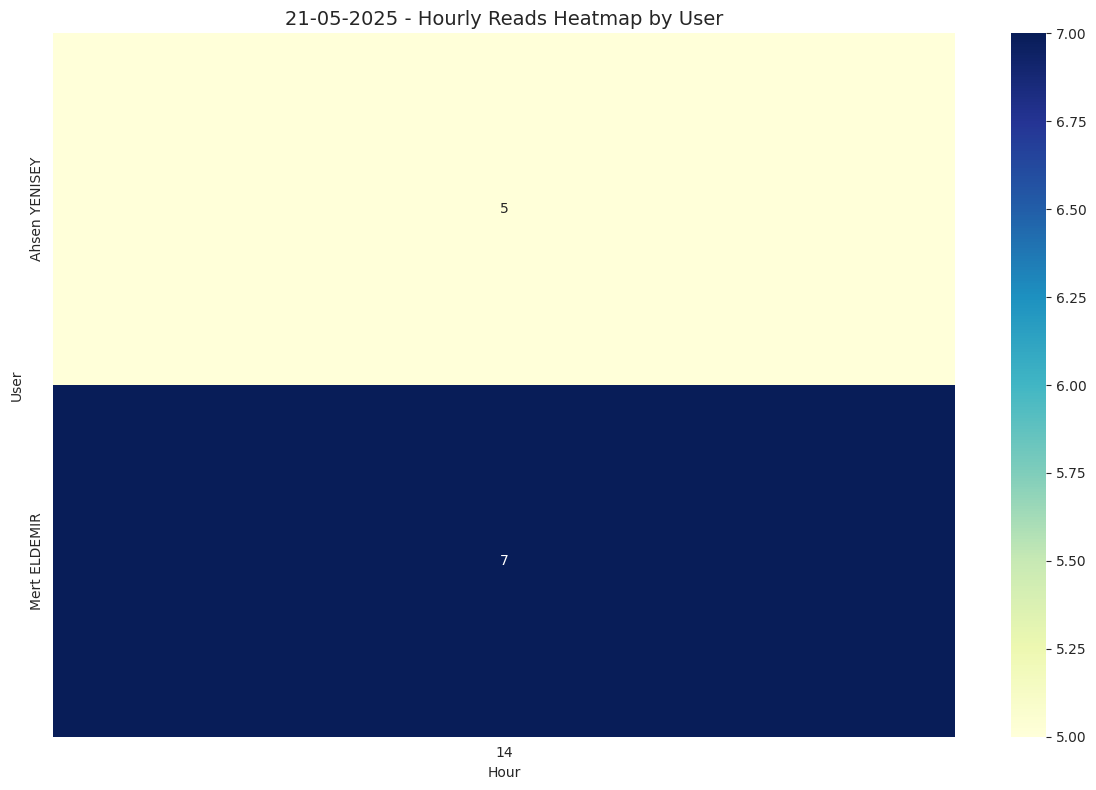


📅 Date: 23-05-2025


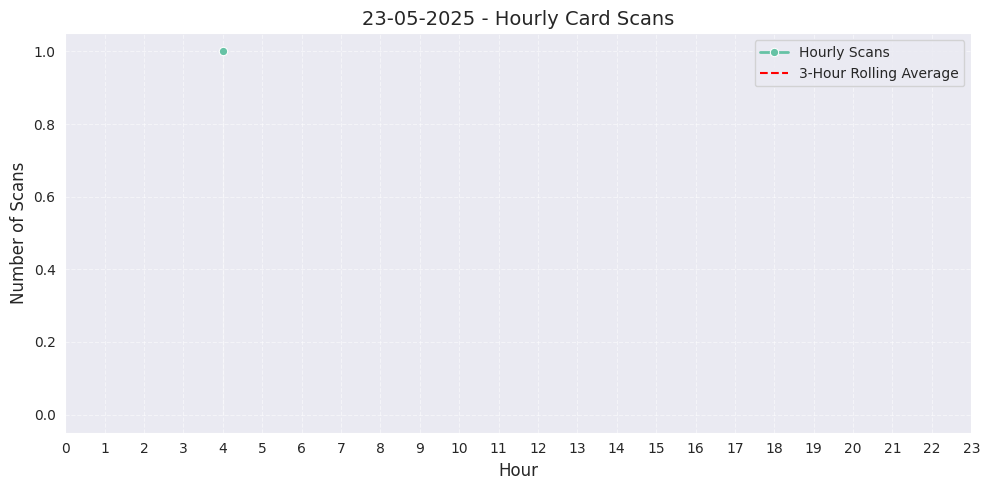

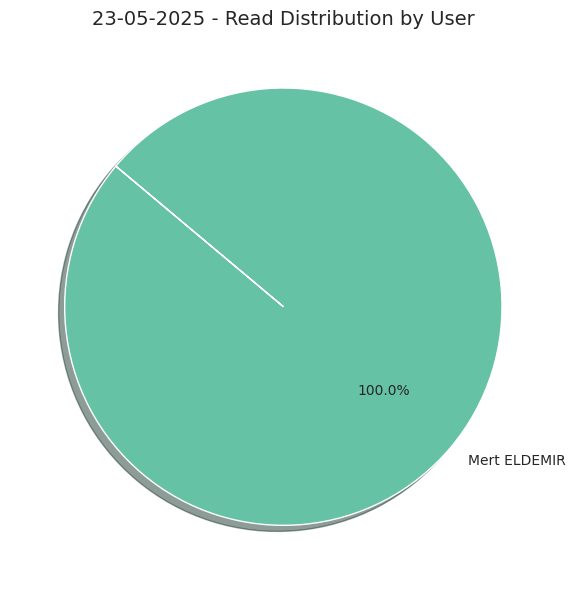

/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


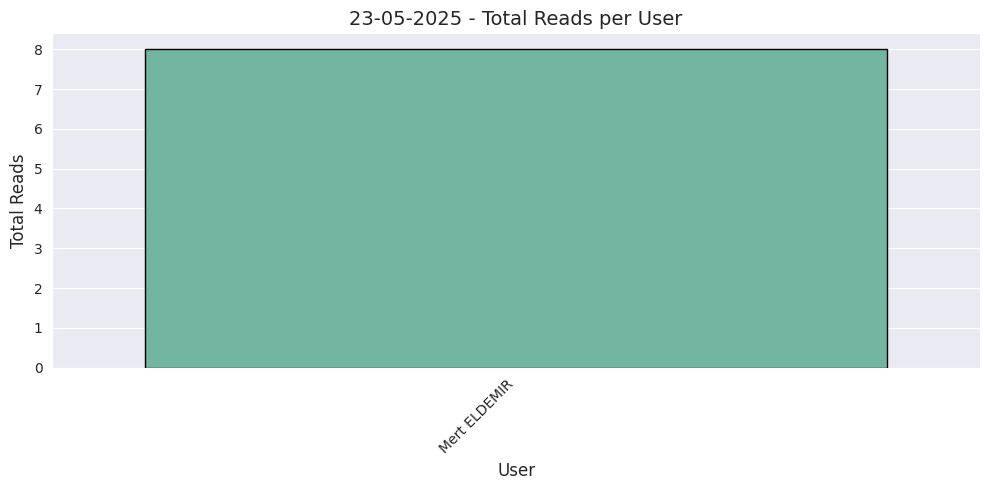

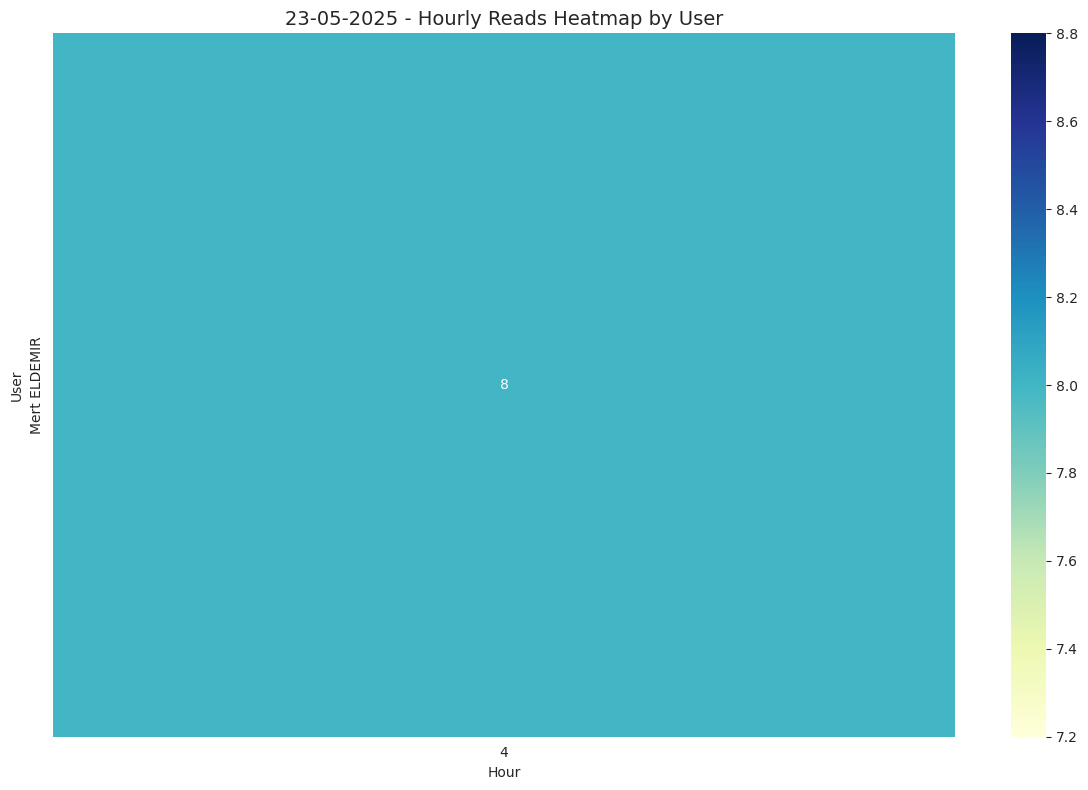


📅 Date: 26-05-2025


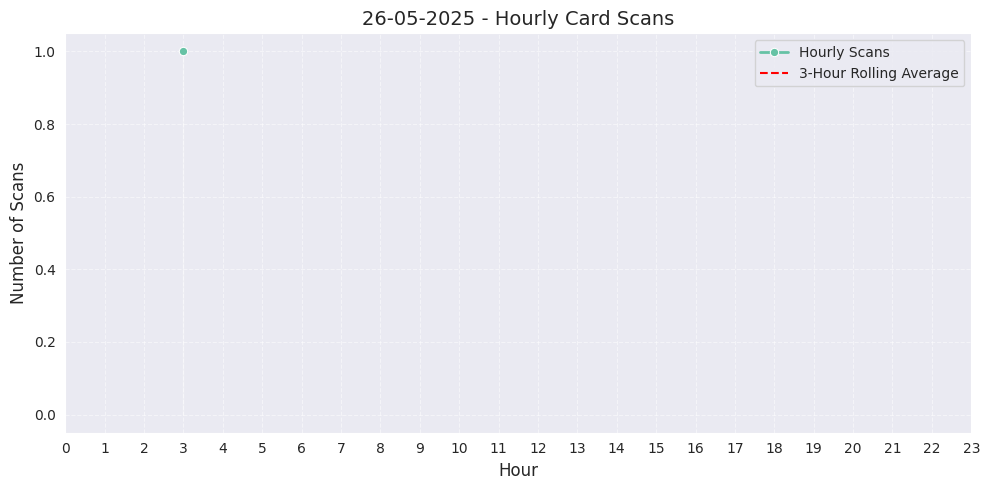

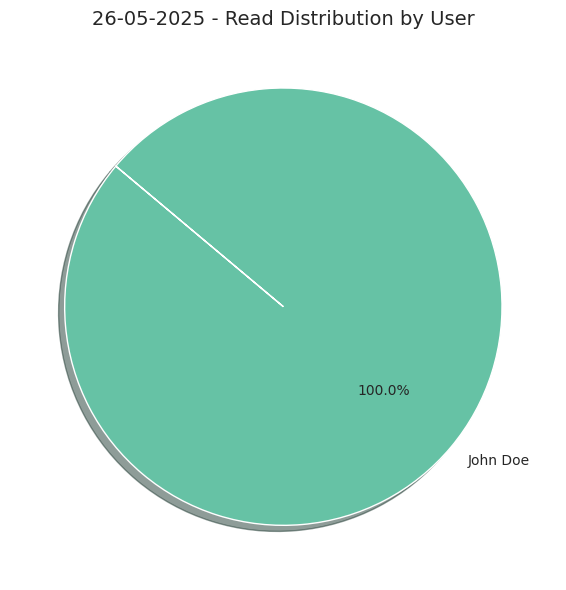

/var/folders/nz/80381vfn4gjc6t4qnn8n4lb80000gn/T/ipykernel_67056/1549376789.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


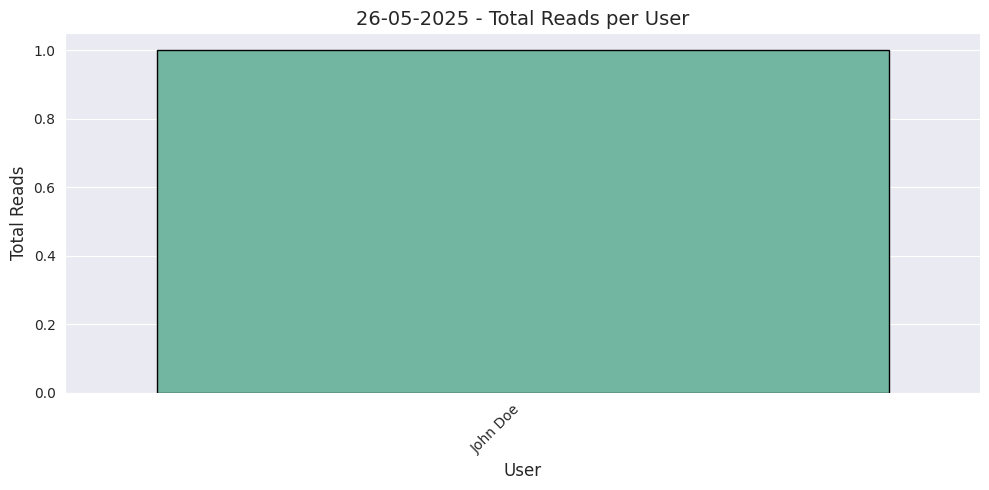

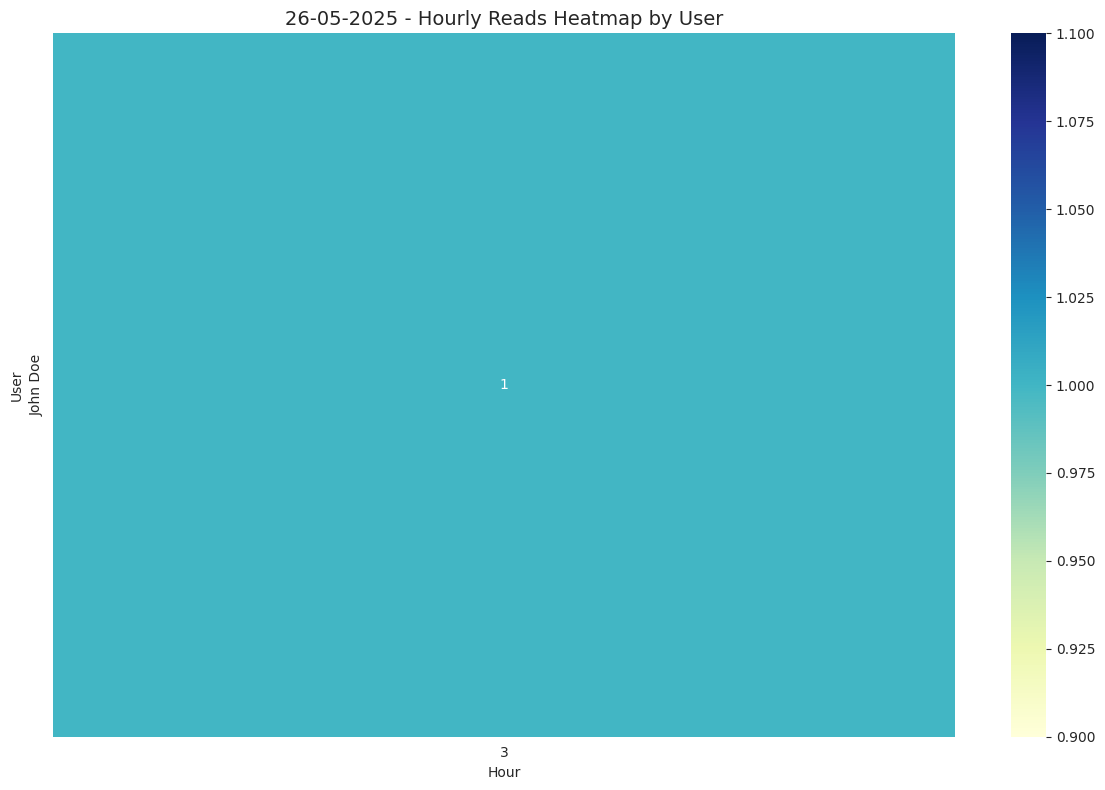

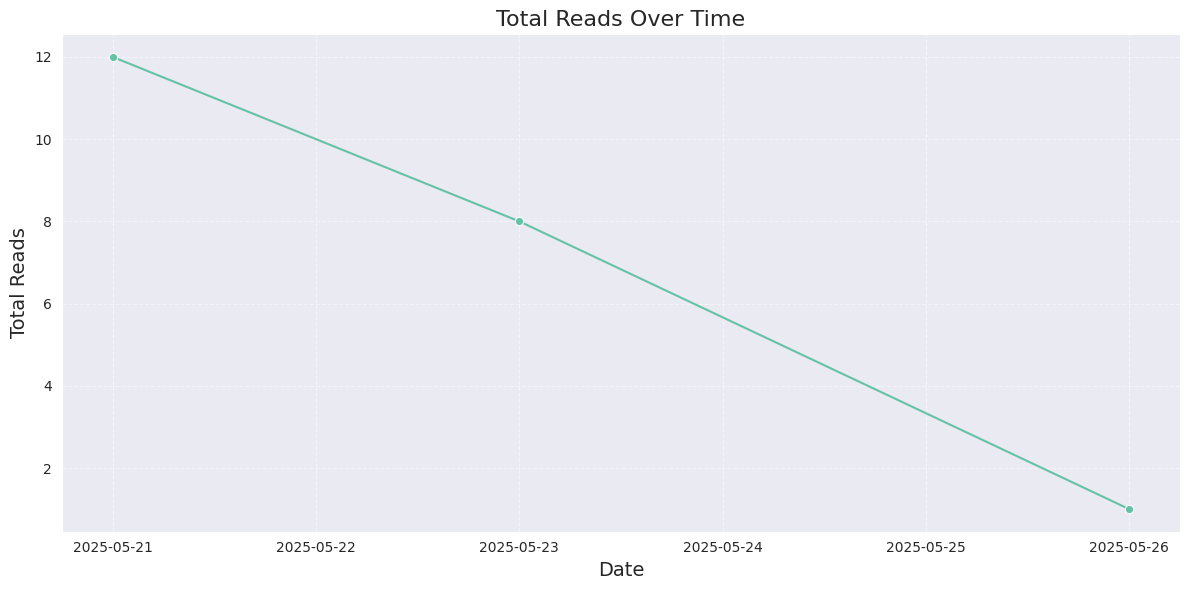

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set_style("darkgrid")
sns.set_palette("Set2")
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["figure.dpi"] = 100

attendance_folder = "../../Database/attendance_lists"

csv_files = sorted([
    f for f in os.listdir(attendance_folder)
    if f.endswith(".csv")
])

dates = []
total_reads_per_date = []

for file in csv_files:
    file_path = os.path.join(attendance_folder, file)
    df = pd.read_csv(file_path)
    report_date_str = os.path.splitext(file)[0]

    if df.empty:
        print(f"⚠️ {report_date_str}: Data file is empty, skipped.")
        continue


    df["last_log_date"] = pd.to_datetime(df["last_log_date"], dayfirst=True, errors='coerce')
    missing_dates = df["last_log_date"].isna().sum()
    if missing_dates > 0:
        print(f"⚠️ {report_date_str}: {missing_dates} rows with invalid dates were skipped.")

 
    df = df.dropna(subset=["last_log_date"])  
    df["hour"] = df["last_log_date"].dt.hour

    print(f"\n📅 Date: {report_date_str}")


    hourly_counts = df.groupby("hour")["card_uid"].count().sort_index()
    if not hourly_counts.empty:
        rolling_avg = hourly_counts.rolling(window=3, center=True).mean()

        plt.figure(figsize=(10, 5))
        sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o", linewidth=2, label="Hourly Scans")
        sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, color='red', linestyle='--', label='3-Hour Rolling Average')
        plt.fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3)
        plt.title(f"{report_date_str} - Hourly Card Scans", fontsize=14)
        plt.xlabel("Hour", fontsize=12)
        plt.ylabel("Number of Scans", fontsize=12)
        plt.xticks(range(0, 24))
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()


    user_totals = df.groupby("user_name")["total_reads"].sum()
    user_totals = user_totals[user_totals > 0]
    if not user_totals.empty:
        plt.figure(figsize=(6, 6))
        user_totals.plot(kind="pie", autopct="%1.1f%%", startangle=140, shadow=True, cmap="Set2")
        plt.title(f"{report_date_str} - Read Distribution by User", fontsize=14)
        plt.ylabel("")
        plt.tight_layout()
        plt.show()


    bar_data = df.sort_values("total_reads", ascending=False)
    if not bar_data.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(
            data=bar_data,
            x="user_name",
            y="total_reads",
            edgecolor="black",
            palette="Set2"
        )
        plt.title(f"{report_date_str} - Total Reads per User", fontsize=14)
        plt.xlabel("User", fontsize=12)
        plt.ylabel("Total Reads", fontsize=12)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


    heatmap_data = df.pivot_table(index='user_name', columns='hour', values='total_reads', aggfunc='sum', fill_value=0)
    if not heatmap_data.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
        plt.title(f"{report_date_str} - Hourly Reads Heatmap by User", fontsize=14)
        plt.xlabel("Hour")
        plt.ylabel("User")
        plt.tight_layout()
        plt.show()


    total_reads_per_date.append(df["total_reads"].sum())
    try:
        date_parsed = pd.to_datetime(report_date_str, dayfirst=True)
    except Exception:
        date_parsed = pd.NaT
    dates.append(date_parsed)


time_series_df = pd.DataFrame({"date": dates, "total_reads": total_reads_per_date})
time_series_df = time_series_df.dropna(subset=["date"])
time_series_df = time_series_df.sort_values("date")

if not time_series_df.empty:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='total_reads', data=time_series_df, marker='o')
    plt.title("Total Reads Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Total Reads", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
